In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [72]:
# load example's combined dataframes
trial_info_df = pd.read_csv("trial_comb_info.csv")
time_bin_df = pd.read_csv("time_bin_comb_info.csv")

In [73]:
time_bin_df.head()

,TimeStamp,TimeBin,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,...,Neuron92,Neuron93,Neuron94,x_position,y_position,x_velocity,y_velocity,x_acceleration,y_acceleration,TargetOn
0,23.79,1,0,0,0,0,0,0,0,0,...,0,0,0,-3.528073,1.246197,-0.058506,-0.091257,-27.356562,-17.469933,0
1,23.80,2,0,0,0,0,0,0,0,0,...,0,0,0,-3.528866,1.245791,-0.022758,0.039102,23.217614,13.524994,0
2,23.81,3,0,0,0,0,0,0,0,0,...,0,0,0,-3.528202,1.245970,0.080537,-0.041023,-12.605531,-10.911118,0
3,23.82,4,0,0,0,0,0,0,0,0,...,0,0,0,-3.528681,1.245885,-0.140814,0.072169,-6.628672,17.104540,0
4,23.83,5,0,0,0,0,0,0,0,0,...,1,0,0,-3.528435,1.245922,0.280550,-0.193932,67.613019,-62.822279,0


In [151]:
time_bin_df.shape

(97, 104)

In [88]:
time_bin_df["summed_activation"] = time_bin_df.iloc[:, 2:96].sum(axis=1)

In [89]:
time_bin_df.head()

,TimeStamp,TimeBin,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,...,Neuron93,Neuron94,x_position,y_position,x_velocity,y_velocity,x_acceleration,y_acceleration,TargetOn,summed_activation
0,23.79,1,0,0,0,0,0,0,0,0,...,0,0,-3.528073,1.246197,-0.058506,-0.091257,-27.356562,-17.469933,0,3
1,23.80,2,0,0,0,0,0,0,0,0,...,0,0,-3.528866,1.245791,-0.022758,0.039102,23.217614,13.524994,0,4
2,23.81,3,0,0,0,0,0,0,0,0,...,0,0,-3.528202,1.245970,0.080537,-0.041023,-12.605531,-10.911118,0,5
3,23.82,4,0,0,0,0,0,0,0,0,...,0,0,-3.528681,1.245885,-0.140814,0.072169,-6.628672,17.104540,0,2
4,23.83,5,0,0,0,0,0,0,0,0,...,0,0,-3.528435,1.245922,0.280550,-0.193932,67.613019,-62.822279,0,9


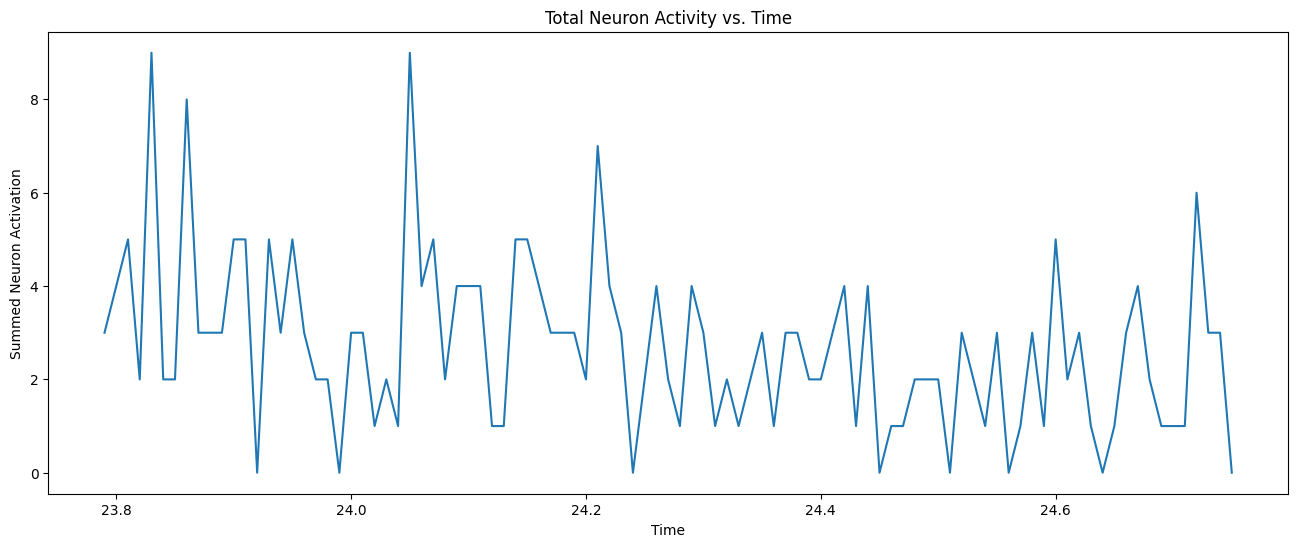

In [130]:
plt.figure(figsize=(16, 6))
plt.plot(time_bin_df["TimeStamp"], time_bin_df["summed_activation"])
plt.xlabel("Time")
plt.ylabel("Summed Neuron Activation")
plt.title("Total Neuron Activity vs. Time")
plt.show()

In [110]:
abs_vel = (time_bin_df["x_velocity"].pow(2) + time_bin_df["y_velocity"].pow(2)).pow(0.5)
abs_vel.head()

0    0.108401
1    0.045242
2    0.090383
3    0.158231
4    0.341054
dtype: float64

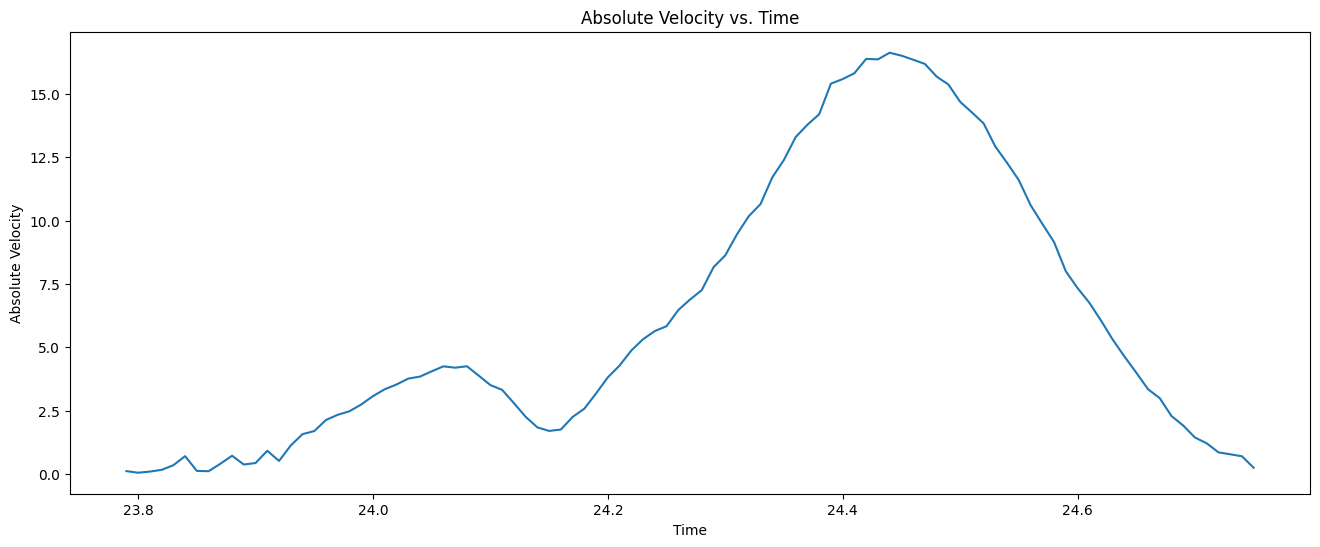

In [129]:
plt.figure(figsize=(16, 6))
plt.plot(time_bin_df["TimeStamp"], abs_vel)
plt.xlabel("Time")
plt.ylabel("Absolute Velocity")
plt.title("Absolute Velocity vs. Time")
plt.show()

In [103]:
abs_accel = (time_bin_df["x_acceleration"].pow(2) + time_bin_df["y_acceleration"].pow(2)).pow(0.5)
abs_accel.head()

0    32.458898
1    26.869743
2    16.671890
3    18.344061
4    92.293873
dtype: float64

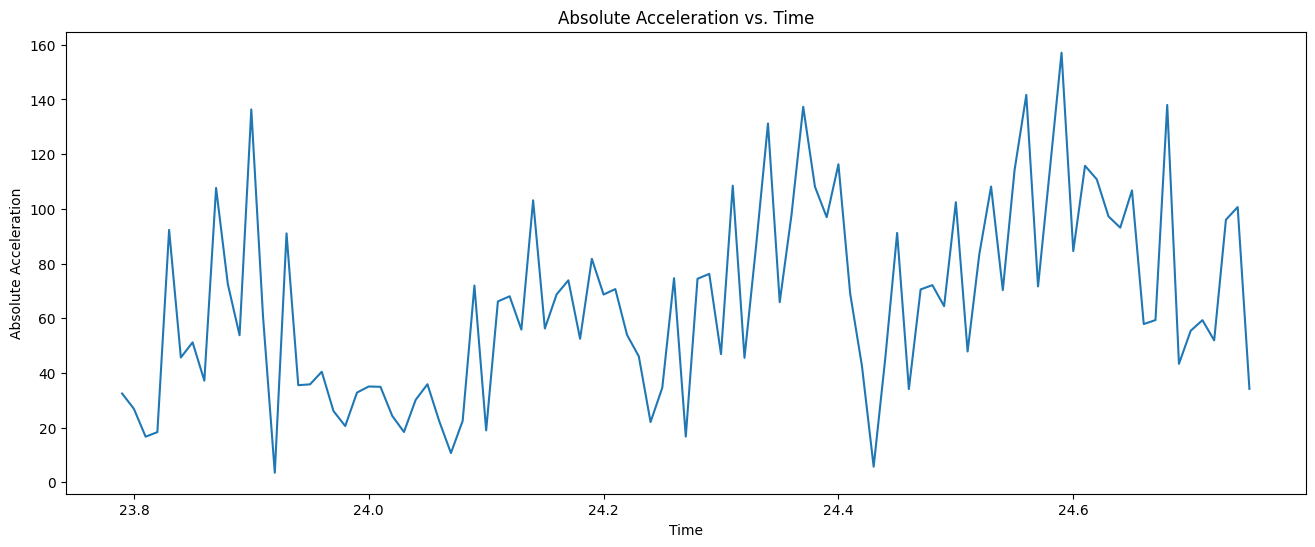

In [128]:
plt.figure(figsize=(16, 6))
plt.plot(time_bin_df["TimeStamp"], abs_accel)
plt.xlabel("Time")
plt.ylabel("Absolute Acceleration")
plt.title("Absolute Acceleration vs. Time")
plt.show()

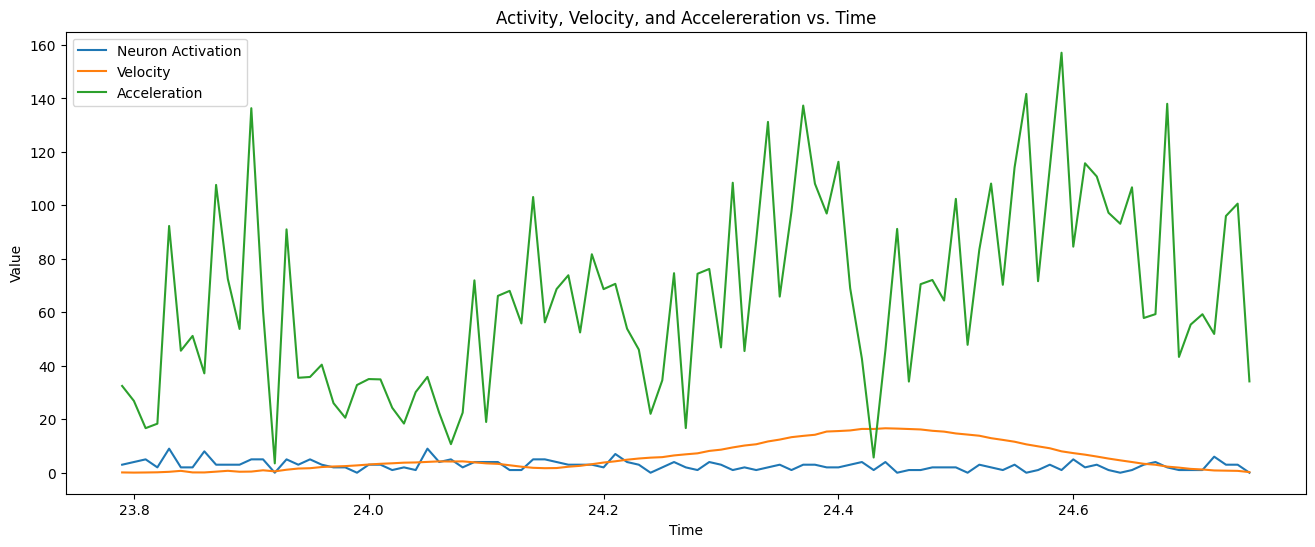

In [127]:
plt.figure(figsize=(16, 6))
plt.plot(time_bin_df["TimeStamp"], time_bin_df["summed_activation"], label="Neuron Activation")
plt.plot(time_bin_df["TimeStamp"], abs_vel, label="Velocity")
plt.plot(time_bin_df["TimeStamp"], abs_accel, label="Acceleration")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Activity, Velocity, and Accelereration vs. Time")
plt.legend()
plt.show()

In [121]:
scaled_act = time_bin_df["summed_activation"] / time_bin_df["summed_activation"].max()
scaled_vel = abs_vel / abs_vel.max()
scaled_accel = abs_accel / abs_accel.max()

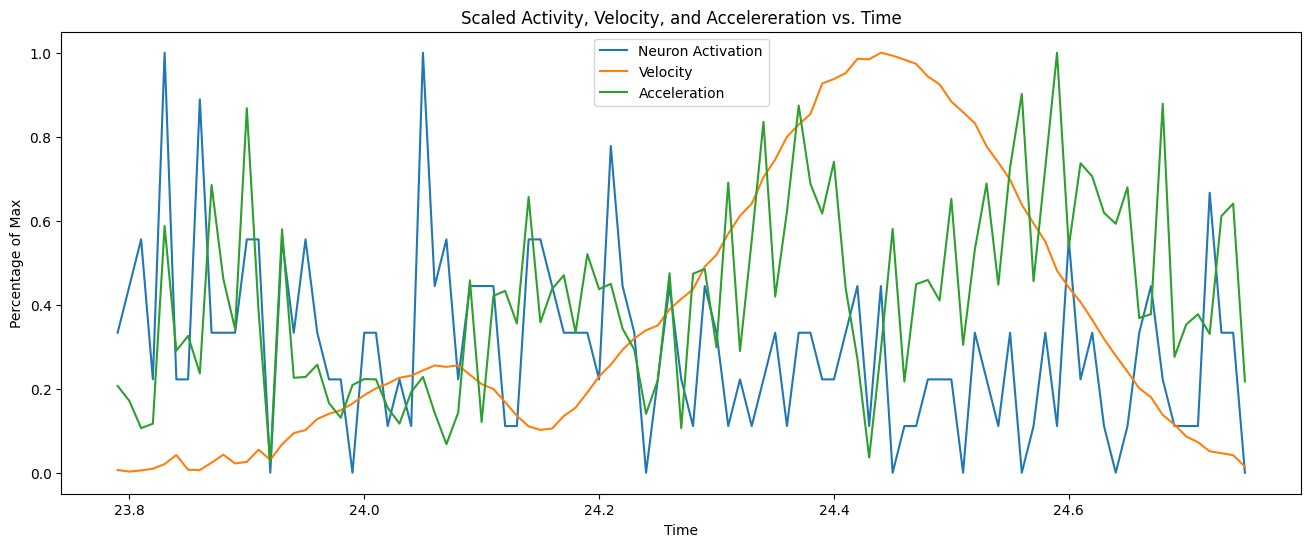

In [126]:
plt.figure(figsize=(16, 6))
plt.plot(time_bin_df["TimeStamp"], scaled_act, label="Neuron Activation")
plt.plot(time_bin_df["TimeStamp"], scaled_vel, label="Velocity")
plt.plot(time_bin_df["TimeStamp"], scaled_accel, label="Acceleration")
plt.xlabel("Time")
plt.ylabel("Percentage of Max")
plt.title("Scaled Activity, Velocity, and Accelereration vs. Time")
plt.legend()
plt.show()

In [141]:
smoothed_act = scaled_act.ewm(alpha=0.3).mean()

smoothed_accel = scaled_accel.ewm(alpha=0.3).mean()

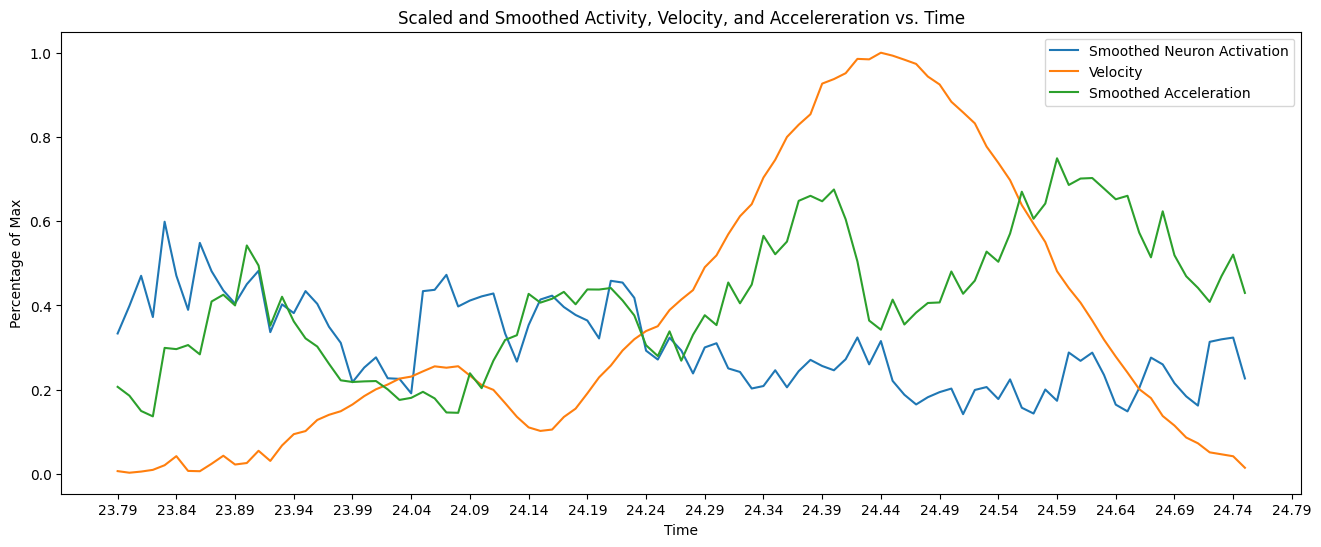

In [147]:
plt.figure(figsize=(16, 6))
plt.plot(time_bin_df["TimeStamp"], smoothed_act, label="Smoothed Neuron Activation")
plt.plot(time_bin_df["TimeStamp"], scaled_vel, label="Velocity")
plt.plot(time_bin_df["TimeStamp"], smoothed_accel, label="Smoothed Acceleration")
plt.xlabel("Time")
tick_positions = np.arange(time_bin_df["TimeStamp"].min(), time_bin_df["TimeStamp"].max()+0.05, 0.05)  # Generate ticks from 0 to max(x) with step 0.5
plt.xticks(tick_positions)
plt.ylabel("Percentage of Max")
plt.title("Scaled and Smoothed Activity, Velocity, and Accelereration vs. Time")
plt.legend()
plt.show()

Looks like there may be a relationship between acceleration and neural activity, with the acceleration spikes coming ~0.07 seconds after the neural activity.

In [152]:
avg_bin = (time_bin_df["TimeStamp"].max() - time_bin_df["TimeStamp"].min()) / len(time_bin_df["TimeStamp"])
0.07 / avg_bin

7.072916666666661

Should be a shift of approximately 7 bins

In [157]:
offset_accel = abs_vel.shift(-7).iloc[:-7]
offset_accel


0     0.104671
1     0.398101
2     0.715750
3     0.368777
4     0.428210
        ...   
85    1.206652
86    0.849521
87    0.772600
88    0.695232
89    0.240708
Length: 90, dtype: float64

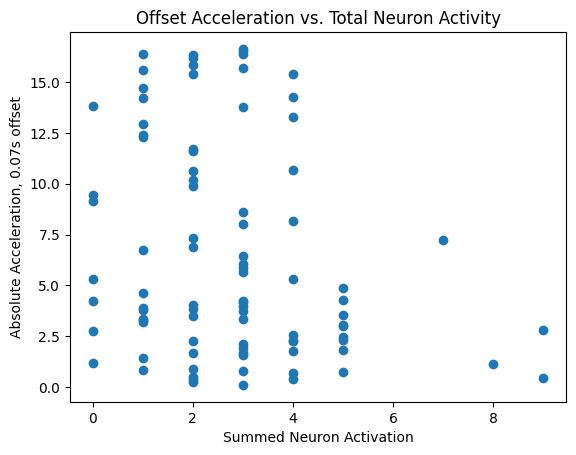

In [160]:
plt.plot(time_bin_df["summed_activation"].iloc[:-7], offset_accel, 'o')
plt.ylabel("Absolute Acceleration, 0.07s offset")
plt.xlabel("Summed Neuron Activation")
plt.title("Offset Acceleration vs. Total Neuron Activity")
plt.show()

In [20]:
ex_df = pd.read_csv("timestamps.csv")
ex_df["TimeStamp"].head()

0    23.79
1    23.80
2    23.81
3    23.82
4    23.83
Name: TimeStamp, dtype: float64

In [16]:
sorted = ex_df["TimeStamp"].sort_values(ascending=True)
sorted.head()


0    23.79
1    23.80
2    23.81
3    23.82
4    23.83
Name: TimeStamp, dtype: float64

In [24]:
sorted_series = pd.Series(sorted, index=ex_df.index)

# Now compare
comp = sorted_series == ex_df["TimeStamp"]
comp.describe()

count     59742
unique        1
top        True
freq      59742
Name: TimeStamp, dtype: object